<a href="https://colab.research.google.com/github/aureguerrero/plantas/blob/main/Entrenar_red_detectron2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import numpy as np
import csv
import os
from zipfile import ZipFile
from numpy.ma.core import sort
import os
import shutil
!git clone https://github.com/aureguerrero/plantas.git

Cloning into 'plantas'...
remote: Enumerating objects: 2299, done.
remote: Counting objects: 100% (977/977), done.
remote: Compressing objects: 100% (654/654), done.
remote: Total 2299 (delta 339), reused 922 (delta 311), pack-reused 1322
Receiving objects: 100% (2299/2299), 304.39 MiB | 26.50 MiB/s, done.
Resolving deltas: 100% (710/710), done.
Checking out files: 100% (2295/2295), done.


# Cargamos los zip

In [3]:
%mkdir arch_zip
buffer='n' #y/n

mkdir: cannot create directory ‘arch_zip’: File exists


In [4]:
data_train={}
data_test={}
for archivo in os.listdir('arch_zip'):
  with ZipFile('/content/arch_zip/'+archivo, 'r') as zip:
    zip.printdir()
    zip.extractall()
  print(len(data_train))
  data=data_train.copy()
  with open('/content/content/plantas/conj_ima_new/train/numpy_train_new.csv') as csvFile:
    csvread=csv.DictReader(csvFile)
    nombre_viejo='2'
    for rows in csvread:
  #    print(rows)
      if rows['filename'] != nombre_viejo:
        data[rows['filename']+rows['file_size']]={}
        data[rows['filename']+rows['file_size']]={'filename': rows['filename'],'size': rows['file_size'],'regions': [{'shape_attributes':json.loads( rows['region_shape_attributes']),'region_attributes': {'obj': 'planta'}}]}
        nombre_viejo=rows['filename']
      else:
        data[rows['filename']+rows['file_size']]['regions'].append({ 'shape_attributes':json.loads( rows['region_shape_attributes']),'region_attributes': {'obj': 'planta'}})
  data_train=data.copy()
  print(len(data_train))  

  print(len(data_test))
  data=data_test.copy()
  with open('/content/content/plantas/conj_ima_new/val/numpy_test_new.csv') as csvFile:
    csvread=csv.DictReader(csvFile)
    nombre_viejo='2'
    for rows in csvread:
  #    print(rows)
      if rows['filename'] != nombre_viejo:
        data[rows['filename']+rows['file_size']]={}
        data[rows['filename']+rows['file_size']]={'filename': rows['filename'],'size': rows['file_size'],'regions': [{'shape_attributes':json.loads( rows['region_shape_attributes']),'region_attributes': {'obj': 'planta'}}]}
        nombre_viejo=rows['filename']
      else:
        data[rows['filename']+rows['file_size']]['regions'].append({ 'shape_attributes':json.loads( rows['region_shape_attributes']),'region_attributes': {'obj': 'planta'}})
  data_test=data.copy()
  print(len(data_test))

if buffer=='y':
  %cd /content/content/plantas/conj_ima_new
  %cp dji*.* /content/plantas/conj_ima
  %cd /content/content/plantas/conj_ima_new/train
  %cp dji*.* /content/plantas/train
  %cd /content/content/plantas/conj_ima_new/val
  %cp dji*.* /content/plantas/val
  test=[_ for _ in sort(os.listdir('/content/plantas/val')) if _.endswith('npy') and _.startswith('dji')]
  train=[_ for _ in sort(os.listdir('/content/plantas/train')) if _.endswith('npy')and _.startswith('dji')]
  at=[['filename', 'file_size', 'file_attributes', 'region_count', 'region_id', 'region_shape_attributes', 'region_attributes']]
  for i in test:
    a=np.load("/content/plantas/val/"+i, allow_pickle=True)
    filename=i[:-3]+'png'
    file_size=str(os.path.getsize(r'/content/plantas/val/'+i[:-3]+'png'))
    file_attributes='"{}"'
    region_count=str(len(a))
    for j in range(0,len(a)):
      region_id=str(j)
      region_shape_attributes='"{""name"":""polygon"",""all_points_x"":['+','.join(str(np.int16(x)) for x in a[j][:,0])+'],""all_points_y"":['+','.join(str(np.int16(x)) for x in a[j][:,1])+']}"'
      region_attributes='""obj"":""planta""'
      at.append([filename, file_size, file_attributes, region_count, region_id, region_shape_attributes, region_attributes])

  at2=[['filename', 'file_size', 'file_attributes', 'region_count', 'region_id', 'region_shape_attributes', 'region_attributes']]

  for i in train:
    a=np.load("/content/plantas/train/"+i, allow_pickle=True)
    filename=i[:-3]+'png'
    file_size=str(os.path.getsize(r'/content/plantas/train/'+i[:-3]+'png'))
    file_attributes='"{}"'
    region_count=str(len(a))
    for j in range(0,len(a)):
      region_id=str(j)
      region_shape_attributes='"{""name"":""polygon"",""all_points_x"":['+','.join(str(np.int16(x)) for x in a[j][:,0])+'],""all_points_y"":['+','.join(str(np.int16(x)) for x in a[j][:,1])+']}"'
      region_attributes='""obj"":""planta""'
      at2.append([filename, file_size, file_attributes, region_count, region_id, region_shape_attributes, region_attributes])


  np.savetxt("/content/plantas/val/numpy_test.csv", at, delimiter =",",fmt ='% s')
  np.savetxt("/content/plantas/train/numpy_train.csv", at2, delimiter =",",fmt ='% s')
  %cp /content/plantas/train/*.csv /content/content/plantas/conj_ima_new/train
  %cp /content/plantas/val/*.csv /content/content/plantas/conj_ima_new/val
  data={}
  with open('/content/plantas/val/numpy_test.csv') as csvFile:
    csvread=csv.DictReader(csvFile)
    nombre_viejo='2'
    for rows in csvread:
  #    print(rows)
      if rows['filename'] != nombre_viejo:
        data[rows['filename']+rows['file_size']]={}
        data[rows['filename']+rows['file_size']]={'filename': rows['filename'],'size': rows['file_size'],'regions': [{'shape_attributes':json.loads( rows['region_shape_attributes']),'region_attributes': {'obj': 'planta'}}]}
        nombre_viejo=rows['filename']
      else:
        data[rows['filename']+rows['file_size']]['regions'].append({ 'shape_attributes':json.loads( rows['region_shape_attributes']),'region_attributes': {'obj': 'planta'}})
  print(len(data))
  data_test=data.copy()
  data={}
  with open('/content/plantas/train/numpy_train.csv') as csvFile:
    csvread=csv.DictReader(csvFile)
    nombre_viejo='2'
    for rows in csvread:
  #    print(rows)
      if rows['filename'] != nombre_viejo:
        data[rows['filename']+rows['file_size']]={}
        data[rows['filename']+rows['file_size']]={'filename': rows['filename'],'size': rows['file_size'],'regions': [{'shape_attributes':json.loads( rows['region_shape_attributes']),'region_attributes': {'obj': 'planta'}}]}
        nombre_viejo=rows['filename']
      else:
        data[rows['filename']+rows['file_size']]['regions'].append({ 'shape_attributes':json.loads( rows['region_shape_attributes']),'region_attributes': {'obj': 'planta'}})
  print(len(data))
  data_train=data.copy()
  with open('/content/plantas/train/via_json.json', 'w') as fp:
    json.dump(data_train, fp)
  %cp /content/plantas/train/*.json /content/content/plantas/conj_ima_new/train
  with open('/content/plantas/val/via_json.json', 'w') as fp:
    json.dump(data_test, fp)
  %cp /content/plantas/val/*.json /content/content/plantas/conj_ima_new/val


else:
  %cd /content/content/plantas/conj_ima_new
  %cp dji*.* /content/plantas/sinbuffer/conj_ima
  %cd /content/content/plantas/conj_ima_new/train
  %cp dji*.* /content/plantas/sinbuffer/train
  %cd /content/content/plantas/conj_ima_new/val
  %cp dji*.* /content/plantas/sinbuffer/val
  test=[_ for _ in sort(os.listdir('/content/plantas/sinbuffer/val')) if _.endswith('npy') and _.startswith('dji')]
  train=[_ for _ in sort(os.listdir('/content/plantas/sinbuffer/train')) if _.endswith('npy')and _.startswith('dji')]
  at=[['filename', 'file_size', 'file_attributes', 'region_count', 'region_id', 'region_shape_attributes', 'region_attributes']]
  for i in test:
    a=np.load("/content/plantas/sinbuffer/val/"+i, allow_pickle=True)
    filename=i[:-3]+'png'
    file_size=str(os.path.getsize(r'/content/plantas/sinbuffer/val/'+i[:-3]+'png'))
    file_attributes='"{}"'
    region_count=str(len(a))
    for j in range(0,len(a)):
      region_id=str(j)
      region_shape_attributes='"{""name"":""polygon"",""all_points_x"":['+','.join(str(np.int16(x)) for x in a[j][:,0])+'],""all_points_y"":['+','.join(str(np.int16(x)) for x in a[j][:,1])+']}"'
      region_attributes='""obj"":""planta""'
      at.append([filename, file_size, file_attributes, region_count, region_id, region_shape_attributes, region_attributes])

  at2=[['filename', 'file_size', 'file_attributes', 'region_count', 'region_id', 'region_shape_attributes', 'region_attributes']]

  for i in train:
    a=np.load("/content/plantas/sinbuffer/train/"+i, allow_pickle=True)
    filename=i[:-3]+'png'
    file_size=str(os.path.getsize(r'/content/plantas/sinbuffer/train/'+i[:-3]+'png'))
    file_attributes='"{}"'
    region_count=str(len(a))
    for j in range(0,len(a)):
      region_id=str(j)
      region_shape_attributes='"{""name"":""polygon"",""all_points_x"":['+','.join(str(np.int16(x)) for x in a[j][:,0])+'],""all_points_y"":['+','.join(str(np.int16(x)) for x in a[j][:,1])+']}"'
      region_attributes='""obj"":""planta""'
      at2.append([filename, file_size, file_attributes, region_count, region_id, region_shape_attributes, region_attributes])


  np.savetxt("/content/plantas/sinbuffer/val/numpy_test.csv", at, delimiter =",",fmt ='% s')
  np.savetxt("/content/plantas/sinbuffer/train/numpy_train.csv", at2, delimiter =",",fmt ='% s')
  %cp /content/plantas/sinbuffer/train/*.csv /content/content/plantas/conj_ima_new/train
  %cp /content/plantas/sinbuffer/val/*.csv /content/content/plantas/conj_ima_new/val
  data={}
  with open('/content/plantas/sinbuffer/val/numpy_test.csv') as csvFile:
    csvread=csv.DictReader(csvFile)
    nombre_viejo='2'
    for rows in csvread:
  #    print(rows)
      if rows['filename'] != nombre_viejo:
        data[rows['filename']+rows['file_size']]={}
        data[rows['filename']+rows['file_size']]={'filename': rows['filename'],'size': rows['file_size'],'regions': [{'shape_attributes':json.loads( rows['region_shape_attributes']),'region_attributes': {'obj': 'planta'}}]}
        nombre_viejo=rows['filename']
      else:
        data[rows['filename']+rows['file_size']]['regions'].append({ 'shape_attributes':json.loads( rows['region_shape_attributes']),'region_attributes': {'obj': 'planta'}})
  print(len(data))
  data_test=data.copy()
  data={}
  with open('/content/plantas/sinbuffer/train/numpy_train.csv') as csvFile:
    csvread=csv.DictReader(csvFile)
    nombre_viejo='2'
    for rows in csvread:
  #    print(rows)
      if rows['filename'] != nombre_viejo:
        data[rows['filename']+rows['file_size']]={}
        data[rows['filename']+rows['file_size']]={'filename': rows['filename'],'size': rows['file_size'],'regions': [{'shape_attributes':json.loads( rows['region_shape_attributes']),'region_attributes': {'obj': 'planta'}}]}
        nombre_viejo=rows['filename']
      else:
        data[rows['filename']+rows['file_size']]['regions'].append({ 'shape_attributes':json.loads( rows['region_shape_attributes']),'region_attributes': {'obj': 'planta'}})
  print(len(data))
  data_train=data.copy()
  with open('/content/plantas/sinbuffer/train/via_json.json', 'w') as fp:
    json.dump(data_train, fp)
  %cp /content/plantas/sinbuffer/train/*.json /content/content/plantas/conj_ima_new/train
  with open('/content/plantas/sinbuffer/val/via_json.json', 'w') as fp:
    json.dump(data_test, fp)
  %cp /content/plantas/sinbuffer/val/*.json /content/content/plantas/conj_ima_new/val  


File Name                                             Modified             Size
content/plantas/conj_ima_new/                  2022-03-15 19:59:06            0
content/plantas/conj_ima_new/dji-0001crop_0_2.png 2022-03-15 19:58:58       543596
content/plantas/conj_ima_new/dji-0002crop_0_0.png 2022-03-15 19:59:00       585681
content/plantas/conj_ima_new/dji-0001crop_1_2.png 2022-03-15 19:58:58       532531
content/plantas/conj_ima_new/dji-0005crop_1_1.png 2022-03-15 19:58:58       596410
content/plantas/conj_ima_new/dji-0004crop_2_1.npy 2022-03-15 19:58:58        84375
content/plantas/conj_ima_new/dji-0005crop_1_3.png 2022-03-15 19:58:58       535754
content/plantas/conj_ima_new/dji-0001crop_0_0.png 2022-03-15 19:58:58       589473
content/plantas/conj_ima_new/dji-0003crop_1_2.png 2022-03-15 19:59:00       514492
content/plantas/conj_ima_new/dji-0004crop_0_0.png 2022-03-15 19:58:56       568063
content/plantas/conj_ima_new/dji-0004crop_1_3.png 2022-03-15 19:58:56       506008
content/pl

#Detectron2

In [5]:
!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

     |████████████████████████████████| 274 kB 5.3 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=48afafb7758cd9e60fd5a34d22c45f50c1d9b55328c513c434a247232acea9b1
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
torch:  1.10 ; cuda:  cu111
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
     |████████████████████████████████| 7.0 MB 1.1 MB/s 
     |████████████████████████████████| 145 kB 5.3 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
     |████████████████████████████████| 74 kB 3.3 MB/s 
     |████████████████████████████████| 130 kB 62.7 MB/s 
     |████████████████████████████████| 749 kB 52.0 MB/s 
     |████████████████████████████████

In [2]:
buffer='n'

Mounted at /content/drive


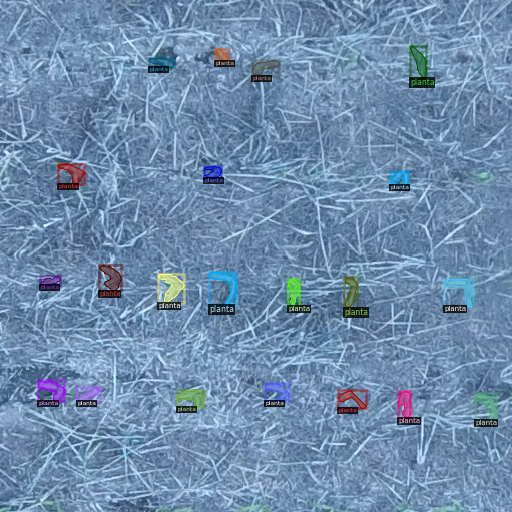

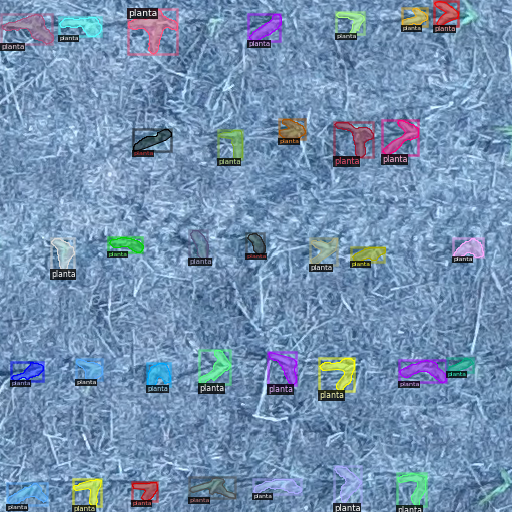

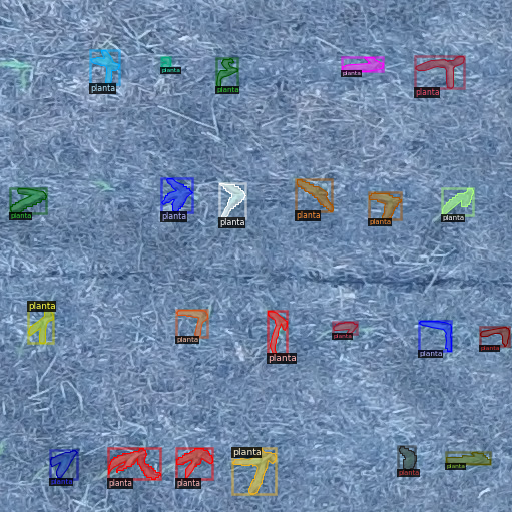

In [3]:
from google.colab import drive
drive.mount('/content/drive')
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

if buffer=='y':
  files_conj_ima="/content/plantas/"
else:
  files_conj_ima="/content/plantas/sinbuffer/"

def get_planta_dicts(img_dir):
    json_file = os.path.join(img_dir, "via_json.json")
    with open(json_file) as f:
        imgs_anns = json.load(f)

    dataset_dicts = []
    for idx, v in enumerate(imgs_anns.values()):
        record = {}
        
        filename = os.path.join(img_dir, v["filename"])
        height, width = cv2.imread(filename).shape[:2]
        
        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
      
        annos = v["regions"]
        objs = []
        for anno in annos:
#            assert not anno["region_attributes"]
            anno = anno["shape_attributes"]
            px = anno["all_points_x"]
            py = anno["all_points_y"]
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": [poly],
                "category_id": 0,
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

for d in ["train", "val"]:
    DatasetCatalog.register("planta_" + d, lambda d=d: get_planta_dicts(files_conj_ima + d))
    MetadataCatalog.get("planta_" + d).set(thing_classes=["planta"])
planta_train_metadata = MetadataCatalog.get("planta_train")
planta_val_metadata = MetadataCatalog.get("planta_val")
dataset_dicts = get_planta_dicts(files_conj_ima+"val")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=planta_val_metadata, scale=1.)
    out2 = visualizer.draw_dataset_dict(d)
    cv2_imshow(out2.get_image()[:, :, ::-1])
    del img,visualizer,out2

In [ ]:
# Por si hay que corregir la celda anterior
# DatasetCatalog.remove('planta_val')
# DatasetCatalog.remove('planta_train')

In [ ]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
#cfg.merge_from_file(os.path.join(cfg.OUTPUT_DIR, "model_final.pth"))
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("planta_train",)
cfg.DATASETS.TEST = ("planta_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = (os.path.join(cfg.OUTPUT_DIR, "model_final.pth"))
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 2000    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()


# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output


#inferencia sobre validación

from detectron2.engine import DefaultTrainer

cfg = get_cfg()
#cfg.merge_from_file(os.path.join(cfg.OUTPUT_DIR, "model_final.pth"))
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("planta_train",)
cfg.DATASETS.TEST = ()#("planta_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = (os.path.join(cfg.OUTPUT_DIR, "model_final.pth"))
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 1000    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.DEVICE='cpu'
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

from detectron2.utils.visualizer import ColorMode
dataset_dicts = get_planta_dicts(files_conj_ima+"val")
for d in dataset_dicts[0:3]:    
    print(d["file_name"])
    print('Verdad vs Predicción')
    im = cv2.imread(d["file_name"])
    visualizer = Visualizer(im[:, :, ::-1], metadata=planta_val_metadata, scale=1.)
    out2 = visualizer.draw_dataset_dict(d)
    
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=planta_val_metadata, 
                   scale=1.0, 
                   instance_mode=ColorMode.IMAGE_BW,
                   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    hor = np.hstack((out2.get_image()[:, :, ::-1], np.zeros((im.shape[0],20,3))+255, out.get_image()[:, :, ::-1]))
    cv2_imshow(hor)
    del im,visualizer,out2,outputs,v,out,hor
    

#guardado de archivos
if buffer=='y':
  shutil.copy('/content/drive/Shareddrives/Conteo de plantas/SEMANTICA/detectron2/output/last_checkpoint', '/content/drive/Shareddrives/Conteo de plantas/SEMANTICA/detectron2/output/conbuffer/last_checkpoint')
  shutil.copy('/content/drive/Shareddrives/Conteo de plantas/SEMANTICA/detectron2/output/metrics.json', '/content/drive/Shareddrives/Conteo de plantas/SEMANTICA/detectron2/output/conbuffer/metrics.json')
  shutil.copy('/content/drive/Shareddrives/Conteo de plantas/SEMANTICA/detectron2/output/model_final.pth', '/content/drive/Shareddrives/Conteo de plantas/SEMANTICA/detectron2/output/conbuffer/model_final.pth')
else:
  shutil.copy('/content/drive/Shareddrives/Conteo de plantas/SEMANTICA/detectron2/output/last_checkpoint', '/content/drive/Shareddrives/Conteo de plantas/SEMANTICA/detectron2/output/sinbuffer/last_checkpoint')
  shutil.copy('/content/drive/Shareddrives/Conteo de plantas/SEMANTICA/detectron2/output/metrics.json', '/content/drive/Shareddrives/Conteo de plantas/SEMANTICA/detectron2/output/sinbuffer/metrics.json')
  shutil.copy('/content/drive/Shareddrives/Conteo de plantas/SEMANTICA/detectron2/output/model_final.pth', '/content/drive/Shareddrives/Conteo de plantas/SEMANTICA/detectron2/output/sinbuffer/model_final.pth')



%cd /content/content/plantas
!zip -r conj_ima_new.zip conj_ima_new/


In [4]:
def get_planta_dicts(img_dir):
    json_file = os.path.join(img_dir, "via_json.json")
    with open(json_file) as f:
        imgs_anns = json.load(f)

    dataset_dicts = []
    for idx, v in enumerate(imgs_anns.values()):
        record = {}
        
        filename = os.path.join(img_dir, v["filename"])
        height, width = cv2.imread(filename).shape[:2]
        
        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
      
        annos = v["regions"]
        objs = []
        for anno in annos:
#            assert not anno["region_attributes"]
            anno = anno["shape_attributes"]
            px = anno["all_points_x"]
            py = anno["all_points_y"]
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": [poly],
                "category_id": 0,
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts



In [ ]:
DatasetCatalog.remove('planta_val')

In [5]:
for d in ["train", "val"]:
    DatasetCatalog.register("planta_" + d, lambda d=d: get_planta_dicts(files_conj_ima + d))
    MetadataCatalog.get("planta_" + d).set(thing_classes=["planta"])
planta_train_metadata = MetadataCatalog.get("planta_train")
planta_val_metadata = MetadataCatalog.get("planta_val")
# DatasetCatalog.register("balloon_" + 'train', lambda d=d: get_balloon_dicts(files_conj_ima + 'train'))
# DatasetCatalog.register("balloon_" + 'val', lambda d=d: get_balloon_dicts(files_conj_ima + 'val'))

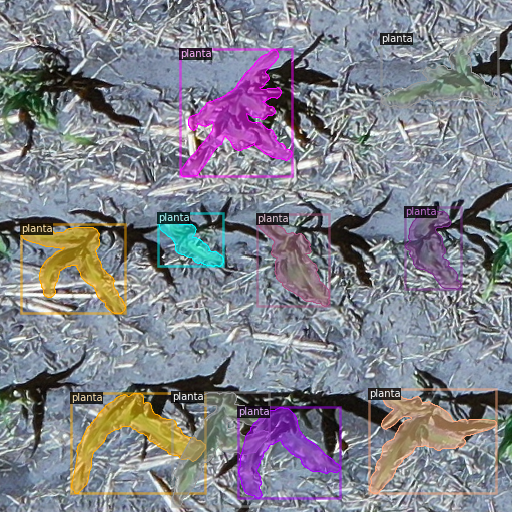

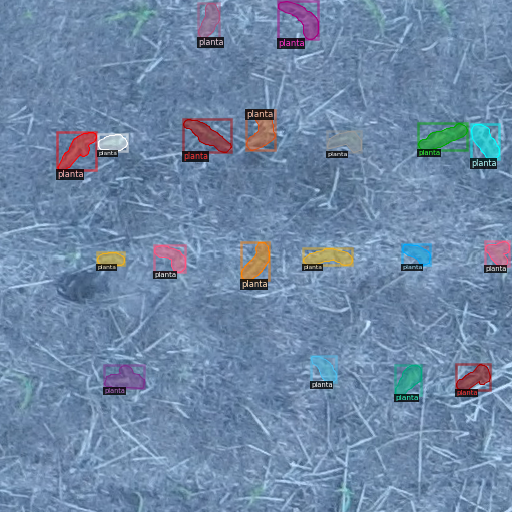

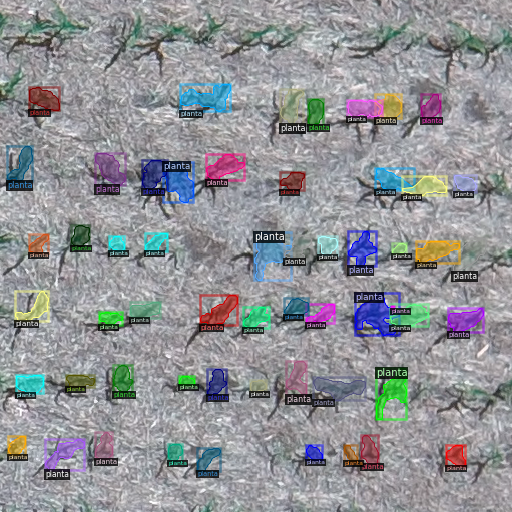

In [6]:
dataset_dicts = get_planta_dicts(files_conj_ima+"val")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=planta_val_metadata, scale=1.)
    out2 = visualizer.draw_dataset_dict(d)
    cv2_imshow(out2.get_image()[:, :, ::-1])
    del img,visualizer,out2

In [5]:
%cd /content/drive/Shareddrives/Prueba mrcnn/detectron2

/content/drive/Shareddrives/Prueba mrcnn/detectron2


In [8]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

In [12]:
%cp /content/drive/Shareddrives/Conteo de plantas 1/SEMANTICA/detectron2/output/model_final.pth /content/drive/Shareddrives/Conteo de plantas (1)/SEMANTICA/detectron2/output/con buffer

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `cp /content/drive/Shareddrives/Conteo de plantas (1)/SEMANTICA/detectron2/output/model_final.pth /content/drive/Shareddrives/Conteo de plantas (1)/SEMANTICA/detectron2/output/con buffer'


In [6]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
#cfg.merge_from_file(os.path.join(cfg.OUTPUT_DIR, "model_final.pth"))
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("planta_train",)
cfg.DATASETS.TEST = ("planta_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = (os.path.join(cfg.OUTPUT_DIR, "model_final.pth"))
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 2000    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

UnicodeDecodeError: ignored

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

## Inference & evaluation using the trained model
Now, let's run inference with the trained model on the balloon validation dataset. First, let's create a predictor using the model we just trained:



In [ ]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
#cfg.merge_from_file(os.path.join(cfg.OUTPUT_DIR, "model_final.pth"))
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("planta_train",)
cfg.DATASETS.TEST = ()#("planta_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = (os.path.join(cfg.OUTPUT_DIR, "model_final.pth"))
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 1000    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.DEVICE='cpu'
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

Resultados en el conjunto de validación

In [ ]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts = get_planta_dicts(files_conj_ima+"val")
for d in dataset_dicts[0:3]:    
    print(d["file_name"])
    print('Verdad vs Predicción')
    im = cv2.imread(d["file_name"])
    visualizer = Visualizer(im[:, :, ::-1], metadata=planta_val_metadata, scale=1.)
    out2 = visualizer.draw_dataset_dict(d)
    
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=planta_val_metadata, 
                   scale=1.0, 
                   instance_mode=ColorMode.IMAGE_BW,
                   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    hor = np.hstack((out2.get_image()[:, :, ::-1], np.zeros((im.shape[0],20,3))+255, out.get_image()[:, :, ::-1]))
    cv2_imshow(hor)
    del im,visualizer,out2,outputs,v,out,hor
    

In [ ]:
%cd /
%cd /content/content/plantas
!zip -r conj_ima_new.zip conj_ima_new/